# Imports

In [90]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read the Data

In [91]:
df = pd.read_csv("insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Pre-preocessing

### 1- Data Understanding

- As we can see below that **[PassengerId, Name, Ticket]**, are not important feature for our problem, so we may like to **drop them**.

In [92]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- **Drop Un-necessary Columns**

In [93]:
df.drop(["children", "region"], axis=1, inplace = True)
df.head()

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520


### 2- Check for Datatypes

- **Display Datatypes**

In [94]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "Num_Uniqe": n_uniq}).T

,age,sex,bmi,smoker,charges
Dtypes,int64,object,float64,object,float64
Num_Uniqe,47,2,548,2,1337


- **Change In-correct Datatypes**

In [95]:
cols = ["sex", "smoker"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,age,sex,bmi,smoker,charges
0,int64,category,float64,category,float64


### 3- Check for Null Values

- **Check for Null Values**

In [96]:
null = df.isnull().sum()
null

age        0
sex        0
bmi        0
smoker     0
charges    0
dtype: int64

In [97]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,age,sex,bmi,smoker,charges
Null_sum,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0


- **Drop Null values in any column**

In [98]:
# no null values in any column

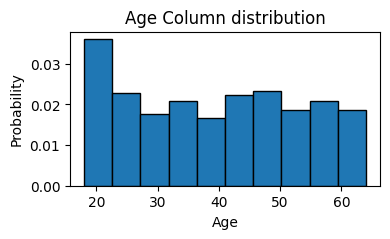

In [99]:
plt.figure(figsize=(4, 2))
plt.hist(df['age'], density=True, edgecolor="black")
plt.title("Age Column distribution")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.show()

In [100]:
median = df["age"].median()
df["age"].fillna(median, inplace=True)

- **Make sure that Null values are removed**

In [101]:
pd.DataFrame(df.isnull().sum()).T

,age,sex,bmi,smoker,charges
0,0,0,0,0,0


### 4- Handle Outliers

- **Check for Outliers**

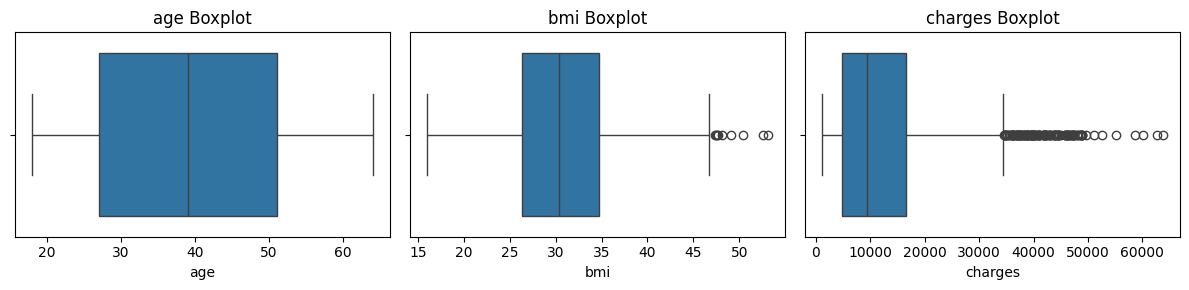

In [102]:
num_cols = df.select_dtypes("number").columns
# Adjust figure size
plt.figure(figsize=(12, 3))  

# Iterate through numeric columns
for i, col in enumerate(num_cols, start=1):
    plt.subplot(1, len(num_cols), i)  # Correct subplot layout
    sns.boxplot(x=df[col])  # Corrected syntax
    plt.title(f"{col} Boxplot")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

- **Remove Outliers**

In [103]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

- **Make Sure Outliers are removed**

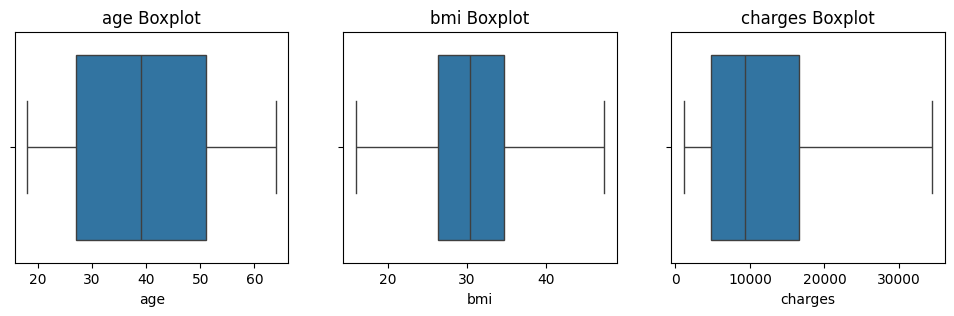

In [104]:
num_cols = df.select_dtypes("number").columns

plt.figure(figsize=(12, 3)) 

for i, col in enumerate(num_cols, start=1):
    plt.subplot(1, len(num_cols), i)  
    sns.boxplot(x=df[col])  
    plt.title(f"{col} Boxplot")

### 5- Visualization

#### A. Data Distribution Graphs

- **Numerical Data Distribution Graphs**

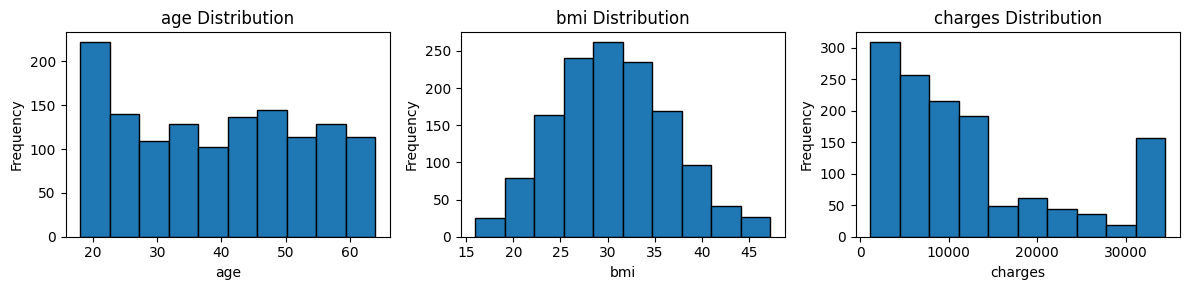

In [105]:
# Histogram
plt.figure(figsize=(12, 3))

for i, col in enumerate(num_cols, start=1):
    plt.subplot(1, len(num_cols), i)  
    plt.hist(df[col], edgecolor="black", bins=10)  
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()  
plt.show()

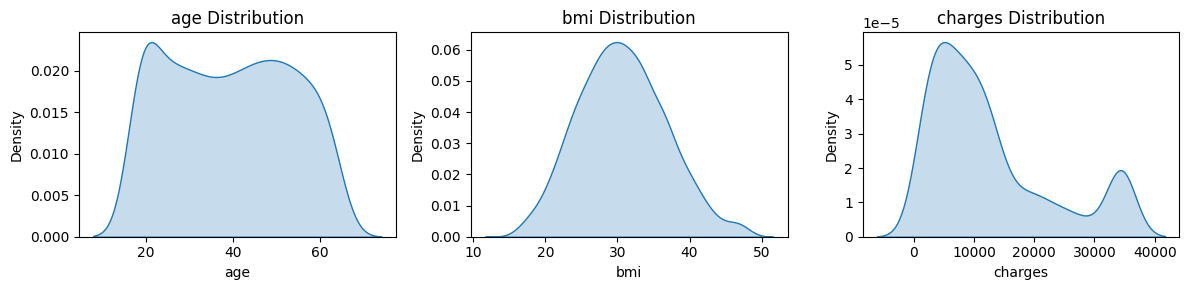

In [106]:
# Kde Plot
plt.figure(figsize=(12, 3))

# Iterate through numeric columns
for i, col in enumerate(num_cols, start=1):
    plt.subplot(1, len(num_cols), i) 
    if df[col].nunique() > 1:  # Check to avoid KDE errors
        sns.kdeplot(df[col], fill=True)  # Added fill for better visualization
    else:
        plt.text(0.5, 0.5, "Insufficient data", ha='center', va='center')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

- **Categorical Data Distribution Graphs**

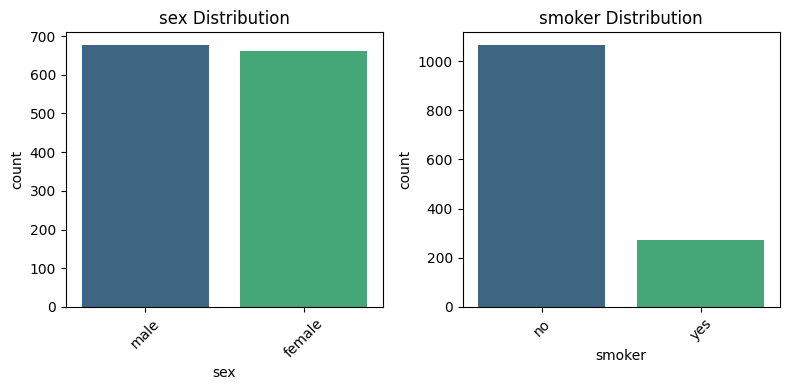

In [107]:
# Count Plot
# Select categorical columns (including object dtype)
cat_cols = df.select_dtypes(include=["object", "category"]).columns

# Only plot if categorical columns exist
if len(cat_cols) > 0:
    plt.figure(figsize=(len(cat_cols) * 4, 4))  

    for i, col in enumerate(cat_cols, start=1):
        plt.subplot(1, len(cat_cols), i)  # Dynamically adjust subplot layout
        sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")
        plt.title(f"{col} Distribution")
        plt.xticks(rotation=45)  

    plt.tight_layout()  
    plt.show()

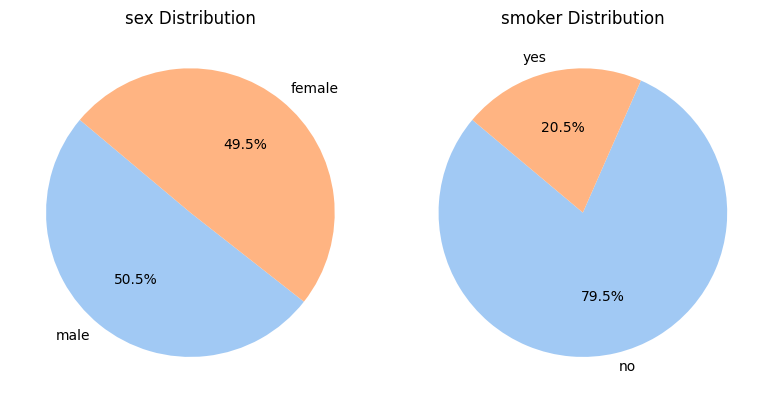

In [108]:
# Pie Plot (not recommended)
cat_cols = df.select_dtypes(include=["object", "category"]).columns

# Only plot if categorical columns exist
if len(cat_cols) > 0:
    plt.figure(figsize=(min(len(cat_cols) * 4, 14), 4))  # Dynamic width
    
    for i, col in enumerate(cat_cols, start=1):
        plt.subplot(1, len(cat_cols), i)  
        unique = df[col].value_counts()
        count = unique.values
        categories = unique.index
        plt.pie(count, labels=categories, startangle=140, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
        plt.title(f"{col} Distribution")

    plt.tight_layout() 
    plt.show()

#### B. Outlier Detection Graphs

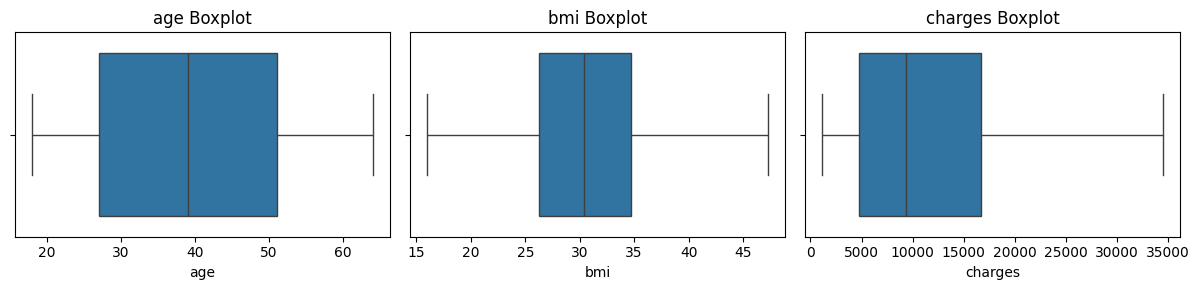

In [109]:
num_cols = df.select_dtypes("number").columns

# Adjust figure size
plt.figure(figsize=(12, 3))

# Iterate through numeric columns
for i, col in enumerate(num_cols, start=1):
    plt.subplot(1, len(num_cols), i)  
    sns.boxplot(x=df[col])  
    plt.title(f"{col} Boxplot")

plt.tight_layout()  
plt.show()

#### C. Relationship Graphs

- **Numerical/Numerical Relationship**

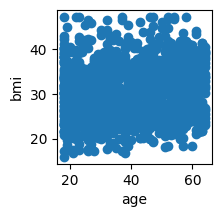

In [110]:
# Scatter Plot
plt.figure(figsize=(2, 2))
plt.scatter(df["age"], df["bmi"])
plt.xlabel("age")
plt.ylabel("bmi")
plt.show()

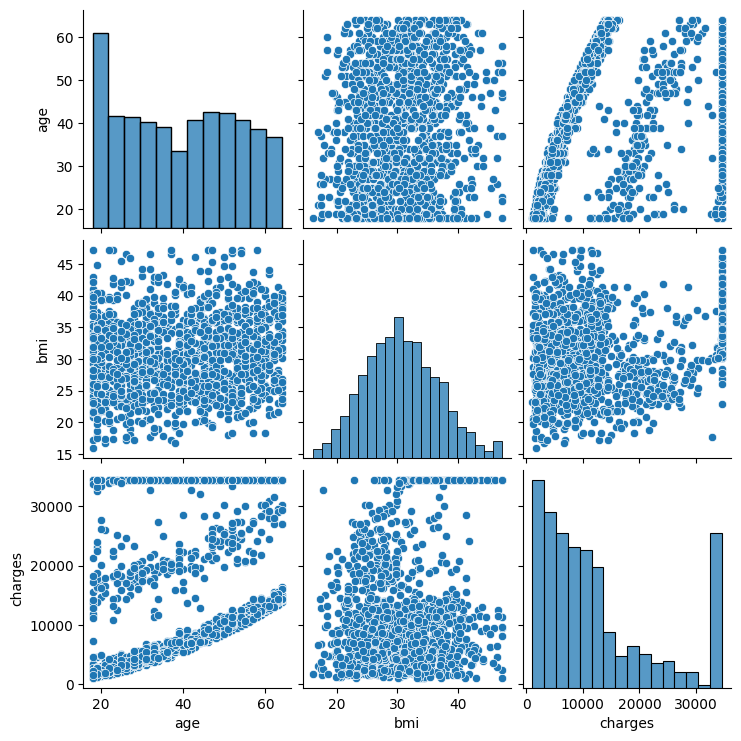

In [111]:
# Pair Plot
sns.pairplot(df)

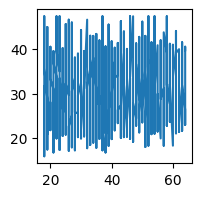

In [112]:
# Line Plot
sorted_df = df.sort_values(by="age")
plt.figure(figsize=(2, 2))
plt.plot(sorted_df["age"], sorted_df["bmi"])
plt.show()

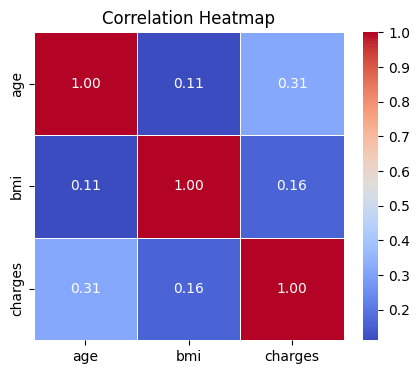

In [113]:
# Heat map
# Compute correlation matrix (excluding non-numeric columns)
corr = df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

- **Numerical/Categorical Relationship**

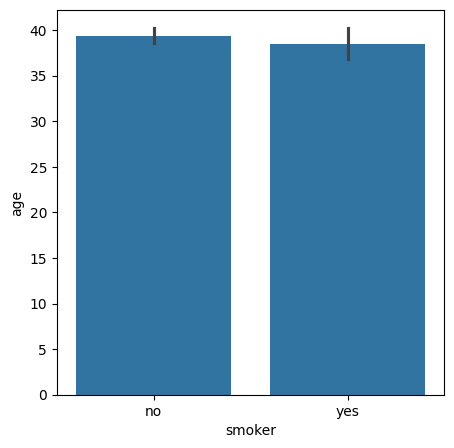

In [114]:
# bar plot
plt.figure(figsize=(5,5))
sns.barplot(x="smoker", y="age", data=df)
plt.show()

- **Categorical/Categorical Relationship**

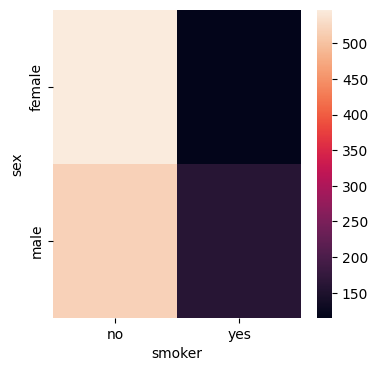

In [115]:
# Heat map
plt.figure(figsize=(4,4))
agg = df.pivot_table(index="sex", columns="smoker", values="age", aggfunc=len)
sns.heatmap(agg)
plt.show()

### 6- Remove Duplicates 

- **Check for Duplicates**

In [116]:
df.duplicated().sum()

np.int64(1)

- **Remove Duplicates**

In [117]:
df.drop_duplicates(inplace=True)

- **Make Sure that Duplicates are Removed**

In [118]:
df.duplicated().sum()

np.int64(0)

### 7- Data Splitting

In [131]:
X = df.drop("charges", axis=1)
y = df[["charges"]]

### 8- Normalization

In [120]:
! pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
    --------------------------------------- 0.5/41.0 MB 1.7 MB/s eta 0:00:24
    --------------------------------------- 0.8/41.0 MB 1.3 MB/s eta 0:00:32
   - -------------------------------------- 1.0/41.0 MB 1.5 MB/s eta 0:00:27
   - -------------------------------------- 1.6/41.0 MB 1.6 MB/s eta 0:00:25
   -- ------

In [132]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

### 9- Encoding

- **Check for Number of Unique Values**

In [137]:
str_cols = ["sex", "smoker"]
pd.DataFrame(X[str_cols].nunique()).T

,sex,smoker
0,2,2


- **One Hot Encoder**

In [134]:
! pip install category_encoders

In [139]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant=True)
X = encoder.fit_transform(X)